A simple and fast cnn model, very easy to use.  It's not the best score, do some little changes and more round training  it will have better result. 

In [1]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("../input/chest-xray-pneumonia"))

['chest-xray-pneumonia']


In [ ]:
# Using Keras framework with TensorFlow background

In [2]:
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Softmax,Input,Flatten
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers.merge import add
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import BatchNormalization

Using TensorFlow backend.


Import sci-kit library and its packages for evaluation

In [3]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score
from keras.metrics import categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator

Building a CNN Sequential model

In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same",
                 input_shape=(64,64,1)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))
model.add(Dense(2, activation="softmax"))

In [7]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
gen = ImageDataGenerator()
train_batches = gen.flow_from_directory("../input/chest-xray-pneumonia/chest_xray/train",model.input_shape[1:3],color_mode="grayscale",shuffle=True,seed=1,
                                        batch_size=16)
valid_batches = gen.flow_from_directory("../input/chest-xray-pneumonia/chest_xray/val", model.input_shape[1:3],color_mode="grayscale", shuffle=True,seed=1,
                                        batch_size=16)
test_batches = gen.flow_from_directory("../input/chest-xray-pneumonia/chest_xray/test", model.input_shape[1:3], shuffle=False,
                                       color_mode="grayscale", batch_size=8)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [14]:
model.compile(Adam(lr=0.0001),loss="categorical_crossentropy", metrics=["accuracy"])
model.fit_generator(train_batches,validation_data=valid_batches,epochs=5)

Epoch 1/5
326/326 [==============================] - 70s 214ms/step - loss: 0.3966 - accuracy: 0.8694 - val_loss: 0.6195 - val_accuracy: 0.6250
Epoch 2/5
326/326 [==============================] - 53s 162ms/step - loss: 0.1952 - accuracy: 0.9323 - val_loss: 0.5138 - val_accuracy: 0.7500
Epoch 3/5
326/326 [==============================] - 54s 165ms/step - loss: 0.1469 - accuracy: 0.9511 - val_loss: 0.4386 - val_accuracy: 0.8125
Epoch 4/5
326/326 [==============================] - 54s 164ms/step - loss: 0.1120 - accuracy: 0.9584 - val_loss: 1.8371 - val_accuracy: 0.5625
Epoch 5/5
326/326 [==============================] - 54s 166ms/step - loss: 0.0942 - accuracy: 0.9664 - val_loss: 1.6050 - val_accuracy: 0.6250


In [27]:
model.summary()

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7fbb6280e588>>

In [15]:
p = model.predict_generator(test_batches, verbose=True)
pre = pd.DataFrame(p)
pre["filename"] = test_batches.filenames
pre["label"] = (pre["filename"].str.contains("PNEUMONIA")).apply(int)
pre['pre'] = (pre[1]>0.5).apply(int)

78/78 [==============================] - 6s 81ms/step


In [16]:
recall_score(pre["label"],pre["pre"])

1.0

In [17]:
roc_auc_score(pre["label"],pre[1])

0.7900230111768574

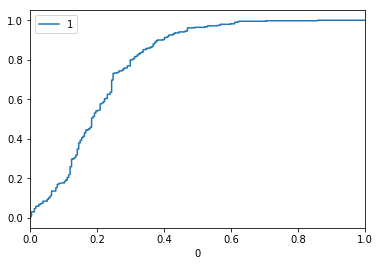

In [18]:
tpr,fpr,thres = roc_curve(pre["label"],pre[1])
roc = pd.DataFrame([tpr,fpr]).T
roc.plot(x=0,y=1)

In [19]:
model.save_weights('model.h5')


In [20]:
model_json = model.to_json()
with open("model.json" , "w") as json_file:
    json_file.write(model_json)

In [21]:
import keras.models
from keras.models import model_from_json

In [23]:
json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [26]:
#load woeights into new model
loaded_model.load_weights("model.h5")
print("Loaded Model from disk")

Loaded Model from disk


In [24]:
loaded_model

In [25]:
loaded_model.compile(Adam(lr=0.0001),loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
from matplotlib.pyplot import imread, imshow
from skimage.transform import resize


In [ ]:
x = imread('output.png',mode='L')
x = np.invert(x)
x = imresize(x,(28,28))
imshow(x)
x = x.reshape(1,28,28,1)